## Code

In [1]:
import scipy
import numpy as np

def gaussian_piramid_build(img, sigma, n_layers):
    G = [img]
    for i in range(1, n_layers):
        G.append(scipy.ndimage.gaussian_filter(G[-1], sigma=sigma))
    return G

def laplasian_piramid_build(img, sigma, n_layers):
    G = gaussian_piramid_build(img, sigma, n_layers)
    L = []
    for i in range(1, n_layers):
        L.append(G[i - 1] - G[i])
    L.append(G[-1])
    return np.array(L)

def combain_images(img1, img2, mask):
    LA = laplasian_piramid_build(img1, 3.5, 10)
    LB = laplasian_piramid_build(img2, 3.5, 10)
    GM = np.array(gaussian_piramid_build(mask, 3.5, 10))

    out = np.zeros(LA.shape[1:], dtype='float64')
    one = np.ones(LA.shape, dtype='float64')

    LS = LA * GM + LB * (one - GM) 
    for i in range(0, LA.shape[0]):
        out += LS[i]
    return out    

In [2]:
%matplotlib inline
from skimage.io import imshow, imread, imsave

img1 = imread('img1.png', plugin='matplotlib')
img2 = imread('img2.png', plugin='matplotlib')
mask = imread('mask.png', plugin='matplotlib')
mask = (mask > 0.5).astype('float64')

out = combain_images(img1, img2, mask)

## Pictures

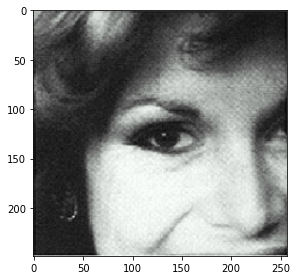

In [134]:
imshow(img1)

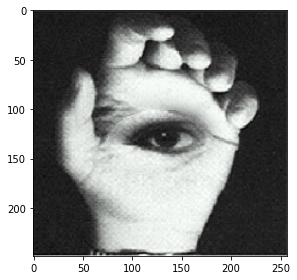

In [3]:
imshow(out)

In [191]:
imsave('out.png', out)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
